In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_belem')

ibmqfactory.load_account:WARNING:2021-10-15 07:05:44,138: Credentials are already in use. The existing account in the session will be replaced.


In [17]:
from qiskit_experiments.library.characterization.qubit_spectroscopy import QubitSpectroscopy
from qiskit_experiments.framework import ParallelExperiment
from qiskit import schedule

In [6]:
# get the basic feautures including qubit number of the backend.
config = backend.configuration()

print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

This backend is called ibmq_belem, and is on version 1.0.21. It has 5 qubits. It does not support OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].


In [15]:
backend = backend

exps=[]

for i in range(config.n_qubits):
    
    freq_estimate = backend.defaults().qubit_freq_est[i]
    frequencies = np.linspace(freq_estimate -15e6, freq_estimate + 15e6, 51)
    exp = QubitSpectroscopy(i, frequencies)
            
    exps.append(exp)
    
 
print(exps)

[<qiskit_experiments.library.characterization.qubit_spectroscopy.QubitSpectroscopy object at 0x7f27a3271850>, <qiskit_experiments.library.characterization.qubit_spectroscopy.QubitSpectroscopy object at 0x7f27a3271880>, <qiskit_experiments.library.characterization.qubit_spectroscopy.QubitSpectroscopy object at 0x7f27a3271a30>, <qiskit_experiments.library.characterization.qubit_spectroscopy.QubitSpectroscopy object at 0x7f27a3271b80>, <qiskit_experiments.library.characterization.qubit_spectroscopy.QubitSpectroscopy object at 0x7f27a3271cd0>]


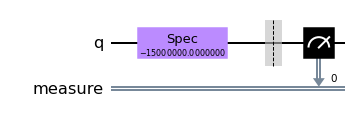

In [21]:
circuit_Q0 = exp.circuits(backend)[0]
circuit_Q0.draw(output="mpl")

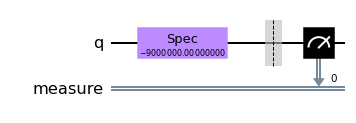

In [25]:
circuit_Q0 = exp.circuits(backend)[10]
circuit_Q0.draw(output="mpl")

In [18]:
parallel_exp = ParallelExperiment(exps)
parallel_data = parallel_exp.run(backend, shots=8192).block_for_results()
    

In [19]:
# View result data
for result in parallel_data.analysis_results():
    print(result)
    print("\nextra:")
    print(result.extra)

DbAnalysisResultV1
- name: parallel_experiment
- value: 5
- extra: <2 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False

extra:
{'experiment_types': ['QubitSpectroscopy', 'QubitSpectroscopy', 'QubitSpectroscopy', 'QubitSpectroscopy', 'QubitSpectroscopy'], 'experiment_ids': ['ec442053-7876-484e-867b-3d53a856c785', 'c133f307-183c-41ef-9082-b28545342914', '2a73fb03-b851-4a6c-b7dd-8748ab1fec8e', '0232e5c1-a18a-4748-97bd-510de87655f8', '106d8ece-b113-4927-8661-31fc38532205']}


Component experiment 0


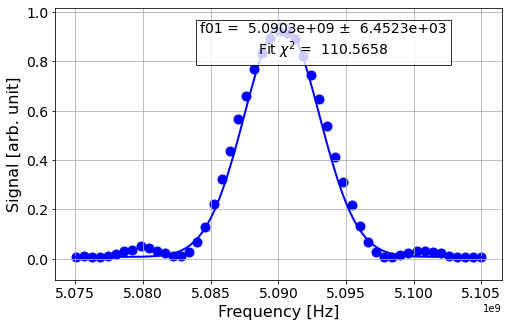

DbAnalysisResultV1
- name: @Parameters_ResonanceAnalysis
- value: [9.49265647e-01 2.77094145e+06 5.09026160e+09 6.90468229e-03] ± [1.44102684e-03 5.38753685e+03 6.45225299e+03 2.44837578e-04]
- χ²: 110.56577813598827
- quality: bad
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: f01
- value: 5090261600.31527 ± 6452.252991940065 Hz
- χ²: 110.56577813598827
- quality: bad
- device_components: ['Q0']
- verified: False
Component experiment 1


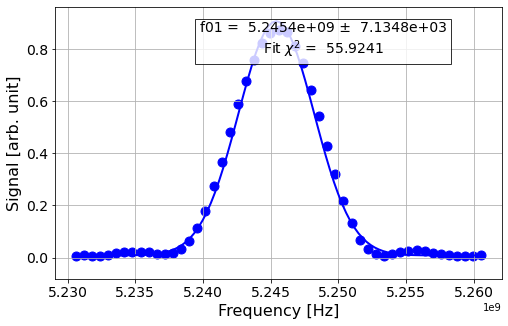

DbAnalysisResultV1
- name: @Parameters_ResonanceAnalysis
- value: [8.97352828e-01 2.79592359e+06 5.24541648e+09 8.63394190e-03] ± [1.67867999e-03 5.95902616e+03 7.13478509e+03 2.50265258e-04]
- χ²: 55.92407272745124
- quality: bad
- extra: <3 items>
- device_components: ['Q1']
- verified: False
DbAnalysisResultV1
- name: f01
- value: 5245416477.913438 ± 7134.785086650251 Hz
- χ²: 55.92407272745124
- quality: bad
- device_components: ['Q1']
- verified: False
Component experiment 2


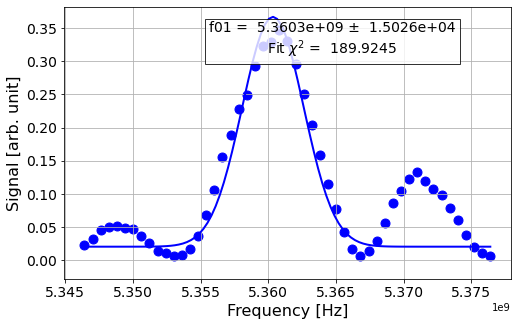

DbAnalysisResultV1
- name: @Parameters_ResonanceAnalysis
- value: [3.46364250e-01 2.27329215e+06 5.36034432e+09 2.04953293e-02] ± [2.27099320e-03 1.34816229e+04 1.50263934e+04 3.14872910e-04]
- χ²: 189.9244751515773
- quality: bad
- extra: <3 items>
- device_components: ['Q2']
- verified: False
DbAnalysisResultV1
- name: f01
- value: 5360344319.937172 ± 15026.393393952863 Hz
- χ²: 189.9244751515773
- quality: bad
- device_components: ['Q2']
- verified: False
Component experiment 3


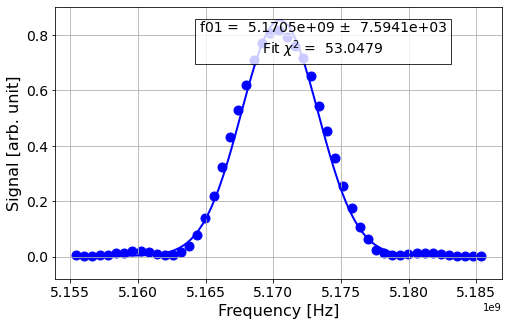

DbAnalysisResultV1
- name: @Parameters_ResonanceAnalysis
- value: [8.50437423e-01 2.84170426e+06 5.17047542e+09 3.83583487e-03] ± [1.84126545e-03 6.00589649e+03 7.59405483e+03 1.84864386e-04]
- χ²: 53.047892889616485
- quality: bad
- extra: <3 items>
- device_components: ['Q3']
- verified: False
DbAnalysisResultV1
- name: f01
- value: 5170475424.331807 ± 7594.054834265127 Hz
- χ²: 53.047892889616485
- quality: bad
- device_components: ['Q3']
- verified: False
Component experiment 4


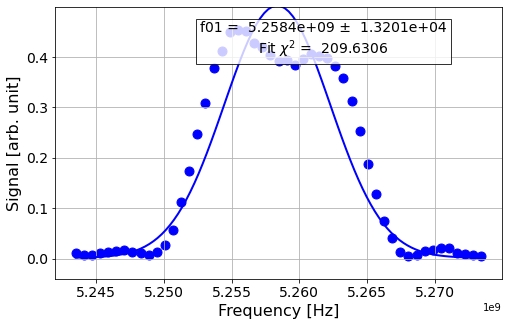

DbAnalysisResultV1
- name: @Parameters_ResonanceAnalysis
- value: [5.00312804e-01 3.92421741e+06 5.25836840e+09 1.40407234e-03] ± [1.78637727e-03 1.14208271e+04 1.32008867e+04 3.10914220e-04]
- χ²: 209.63062567570017
- quality: bad
- extra: <3 items>
- device_components: ['Q4']
- verified: False
DbAnalysisResultV1
- name: f01
- value: 5258368404.012667 ± 13200.886690568472 Hz
- χ²: 209.63062567570017
- quality: bad
- device_components: ['Q4']
- verified: False


In [20]:
# Print sub-experiment data
for i in range(parallel_exp.num_experiments):
    print(f"Component experiment {i}")
    sub_data = parallel_data.component_experiment_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)